In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data=data.drop(['id','Residence_type','work_type'], axis=1)

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 359.4+ KB


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.shape

(5110, 9)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
print(data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [13]:
new_data=data[data['stroke']==1]

gender
Female    141
Male      108
Name: count, dtype: int64
[141, 108]


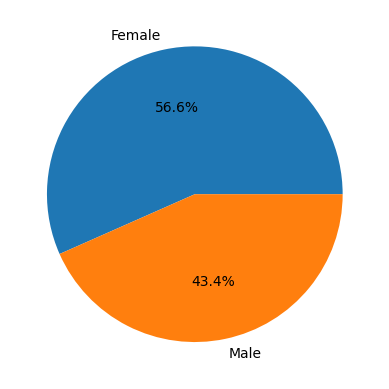

In [14]:
new_data=data[data['stroke']==1]
print(new_data['gender'].value_counts())
gender_data=list(new_data['gender'].value_counts())
print(gender_data)
plt.pie(gender_data,labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

[141, 108]


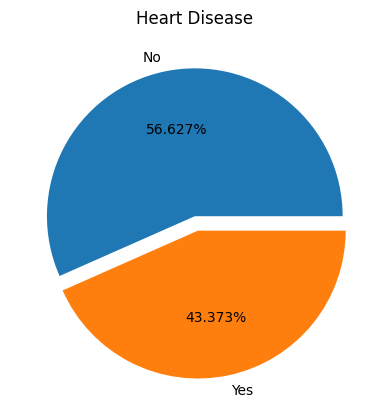

In [15]:
heart_disease=list(new_data['heart_disease'].value_counts())
print(gender_data)
plt.title('Heart Disease')
plt.pie(gender_data,labels=['No','Yes'],autopct='%.3f%%', explode = [0, 0.1])
plt.show()

Text(0.5, 1.0, 'varian bmi')

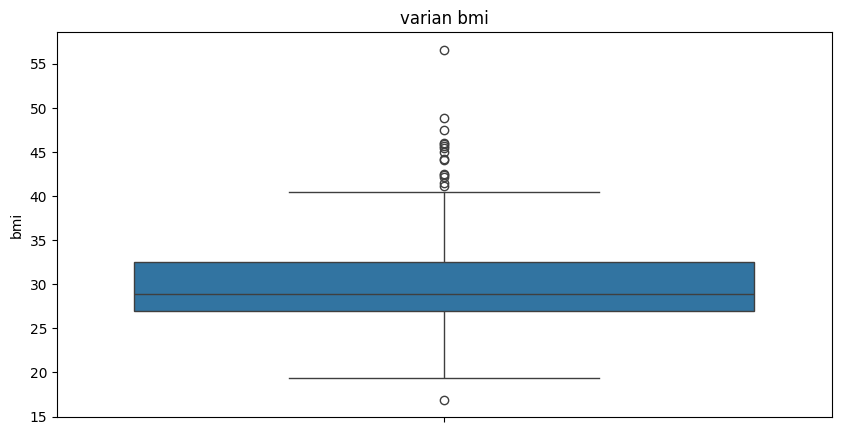

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(new_data['bmi'])
plt.title("varian bmi")

In [17]:
d_list = data.select_dtypes(include = ['object']).columns.tolist()

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in d_list:
  le.fit(data[i])
  data[i] = le.transform(data[i])

In [19]:
from imblearn.over_sampling import SMOTE
import pandas as pd

#pisahkan fitur dan target
X = data.drop('stroke', axis=1)
y = data['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#inisialisasi SMOTE
smote = SMOTE(random_state=0)

#Oversampling menggunakn SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

#Cek Jumlah Sample setelah oversampling
print("Jumlah Sample Setelah Oversampling:", len(X))
print("Jumlah sample setelah oversampling:", len(X_resampled))

#Balikkan ke dalam dataframe
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
resampled_data.to_csv('stroke_data_oversampled.csv', index=False)



Jumlah Sample Setelah Oversampling: 5110
Jumlah sample setelah oversampling: 9722


In [20]:
data=pd.read_csv('stroke_data_oversampled.csv')

In [21]:
data['stroke'].value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pred2 = model.predict(X_test)

0.9499217527386542


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

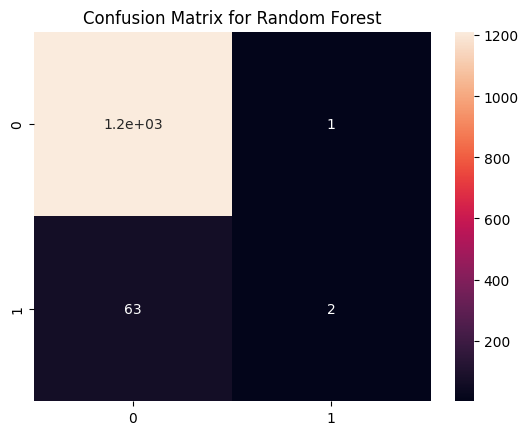

In [23]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, pred2)
sns.heatmap(cn, annot=True)
plt.title("Confusion Matrix for Random Forest")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.67      0.03      0.06        65

    accuracy                           0.95      1278
   macro avg       0.81      0.51      0.52      1278
weighted avg       0.94      0.95      0.93      1278



In [25]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 5),
    'min_samples_leaf': np.arange(1, 5),
    'min_samples_split': np.arange(1, 5),
    'max_features': ['sqrt'],
    'random_state': [10]
}

rf_model=RandomForestClassifier()

rf_hyper_model=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model.fit(X_train,y_train)

c:\Users\LENOVO\Documents\Tugas Semester 7\Kecerdasan Buatan\Web\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
960 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\Documents\Tugas Semester 7\Kecerdasan Buatan\Web\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\Documents\Tugas Semester 7\Kecerdasan Buatan\Web\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([2, 3, 4]), 'max_features': ['sqrt'], 'min_samples_leaf': array([1, 2, 3, 4]), ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(3)


In [26]:
rf_hyper_model.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(4),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(4),
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(3),
 'random_state': 10}

In [27]:
rf_hyper_model.score(X_test,y_test)

0.9491392801251957

In [28]:
import pickle

In [29]:
pickle.dump(model, open('stroke.pkl', 'wb'))